In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost

In [4]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


sns.set_style('darkgrid')
pd. set_option("display.max_columns", None)




import warnings
warnings.filterwarnings('ignore')

### Import Data

In [5]:
df = pd.read_csv('RTA Dataset.csv')

In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


### Exploratory Data Analysis

In [7]:
df.shape

(12316, 32)

In [8]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [9]:
# converting 'time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [11]:
#for numerical columns
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [12]:
#for categorical columns
#Here 'O' describe to include only columns with object('string')data type in summary statistics & 'T' to transpose rows & columns
df.describe(include=['O']).T

,count,unique,top,freq
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883
Defect_of_vehicle,7889,3,No defect,7777


In [13]:
#checking missing values
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [14]:
#Check duplicates
print('Number of duplicates: ', df.duplicated().sum())
print('Unique values per column: ')
df.nunique()

Number of duplicates:  0
Unique values per column: 


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [15]:
#extracting hours and minutes from datettime column
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df.drop('Time', axis=1, inplace=True)

In [16]:
df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17,2
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17,2
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17,2
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,6
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1,6


In [17]:
#Barplot or countplot- categorical variables

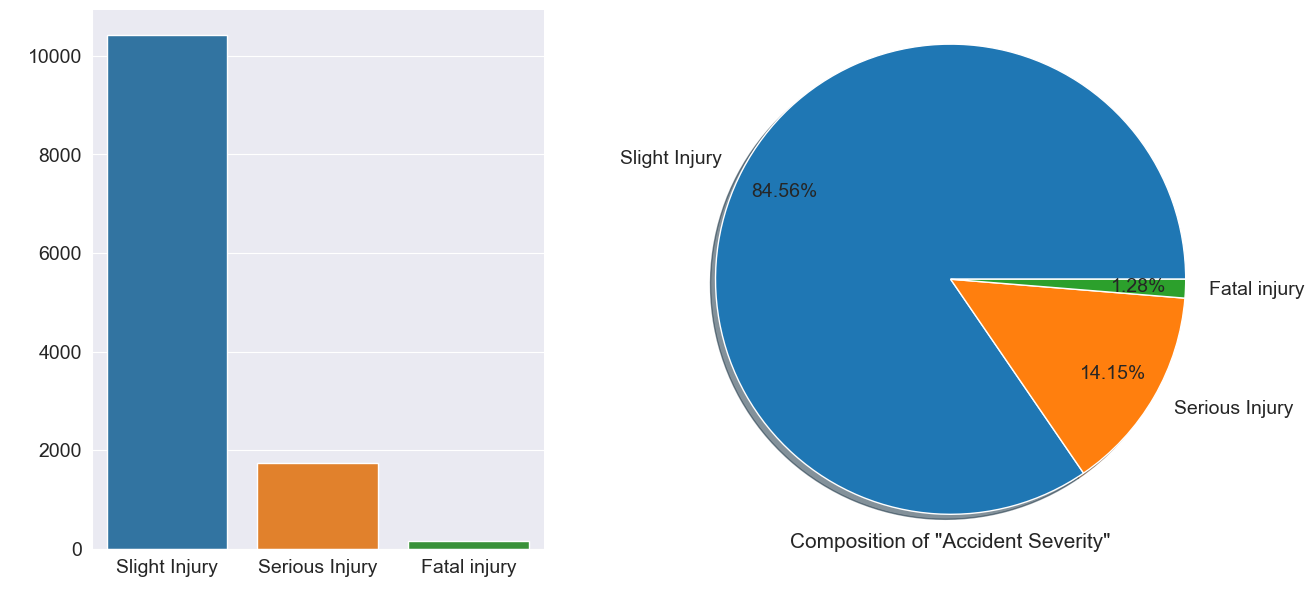

In [18]:
# checking the target
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(df["Accident_severity"].value_counts(),
        labels=list(df["Accident_severity"].unique()),
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [19]:
#from above diagram we can say that most of the accidents cause slight injury anf fewer serious injuries around 15% and less than 2% caused death

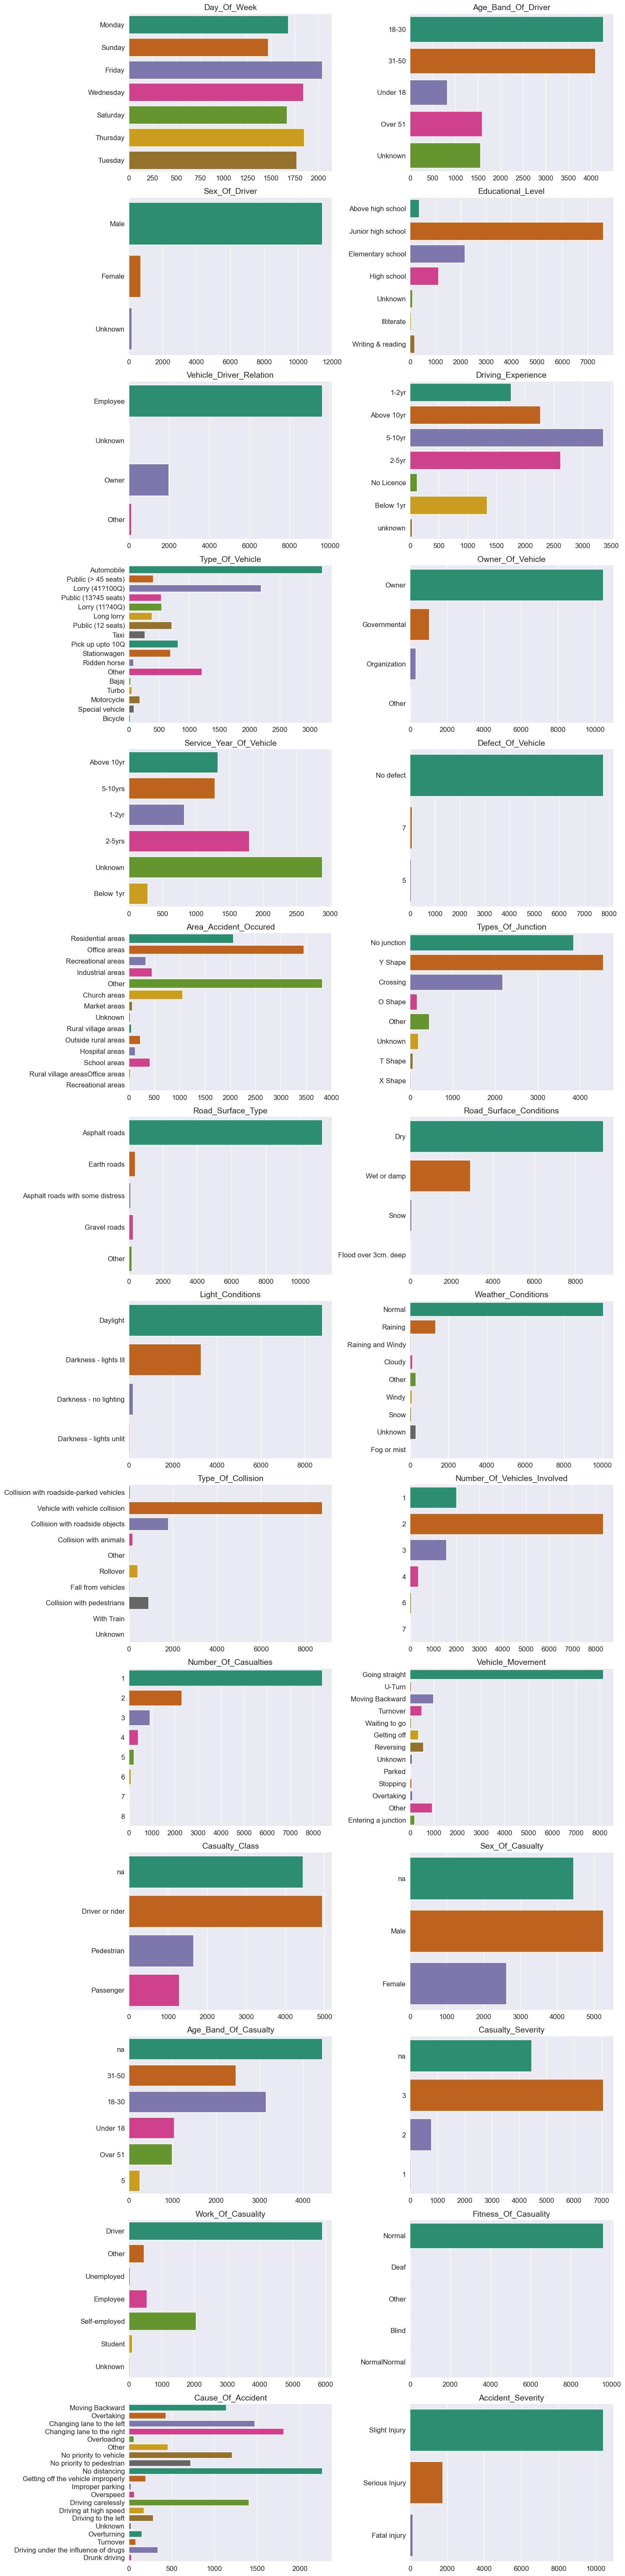

In [20]:
plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['hour', 'minute', 'Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

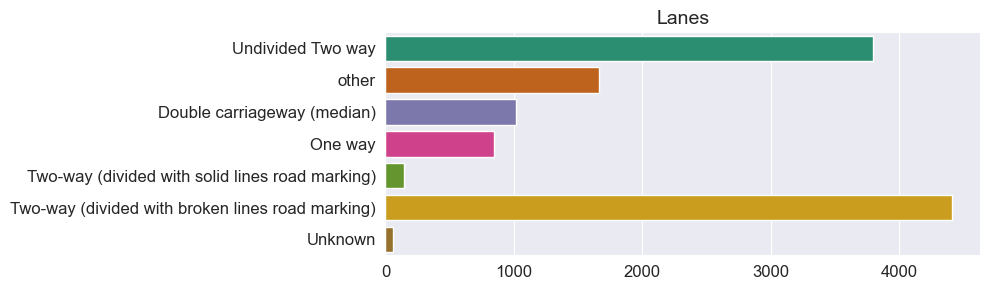

In [21]:
# Set the size of the plot

plt.figure(figsize=(10,3))

# Create a countplot using Seaborn, where the y-axis shows the categories in the 'Lanes_or_Medians' column of the DataFrame
# and the x-axis shows the count of each category in the DataFrame
sns.countplot(data=df, y='Lanes_or_Medians', palette = 'Dark2')

# Set the font size of the x-axis and y-axis ticks to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the title of the plot to 'Lanes' with font size 14
plt.title('Lanes', fontsize=14)
# Remove the x-axis and y-axis labels
plt.xlabel('')
plt.ylabel('')
# Make the plot more compact by adjusting the layout
plt.tight_layout()

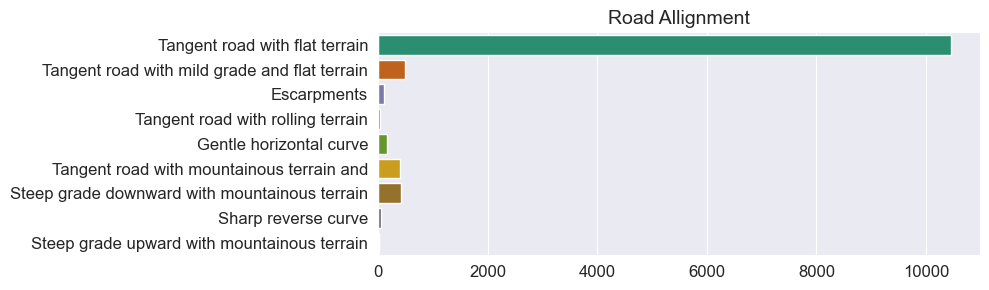

In [22]:
# Set the size of the plot
plt.figure(figsize=(10,3))

# Create a countplot using Seaborn, where the y-axis shows the categories in the 'Road_allignment' column of the DataFrame
# and the x-axis shows the count of each category in the DataFrame
sns.countplot(data=df, y='Road_allignment', palette = 'Dark2')

# Set the font size of the x-axis and y-axis ticks to 12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Set the title of the plot to 'Road Allignment' with font size 14
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
# Make the plot more compact by adjusting the layout
plt.tight_layout()

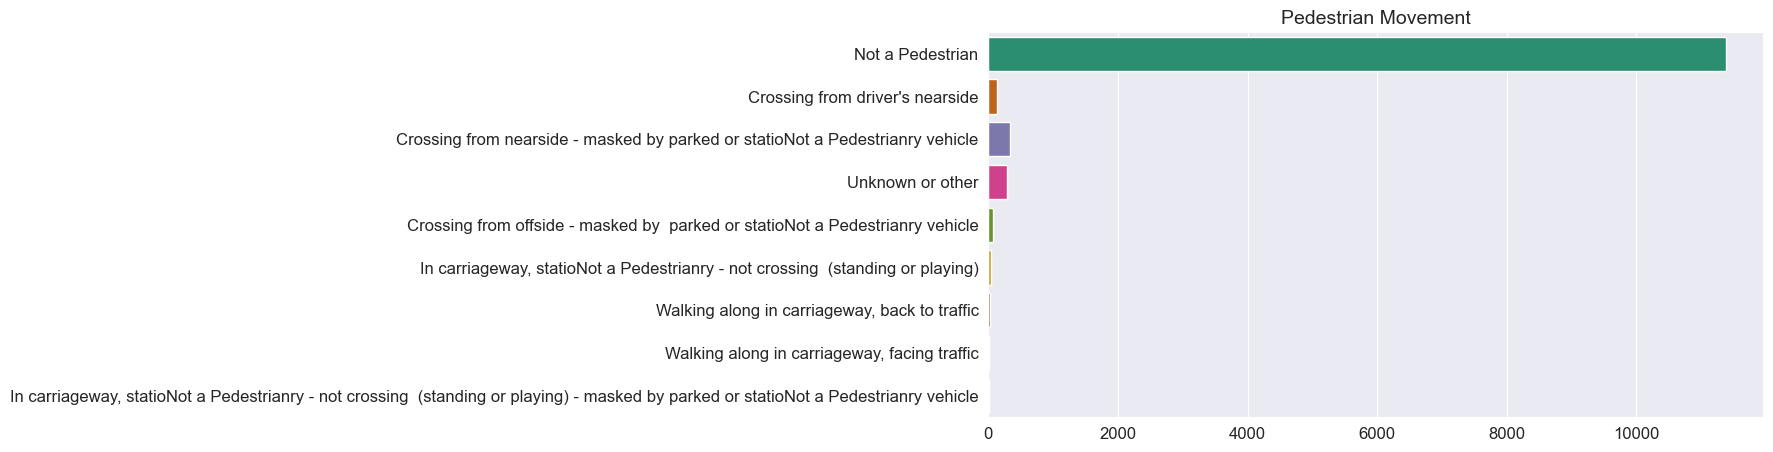

In [23]:
plt.figure(figsize=(10,5))
# Create a countplot using Seaborn, where the y-axis shows the categories in the 'Pedestrain_movement' column of the DataFrame
# and the x-axis shows the count of each category in the DataFrame
sns.countplot(data=df, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Pedestrian Movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

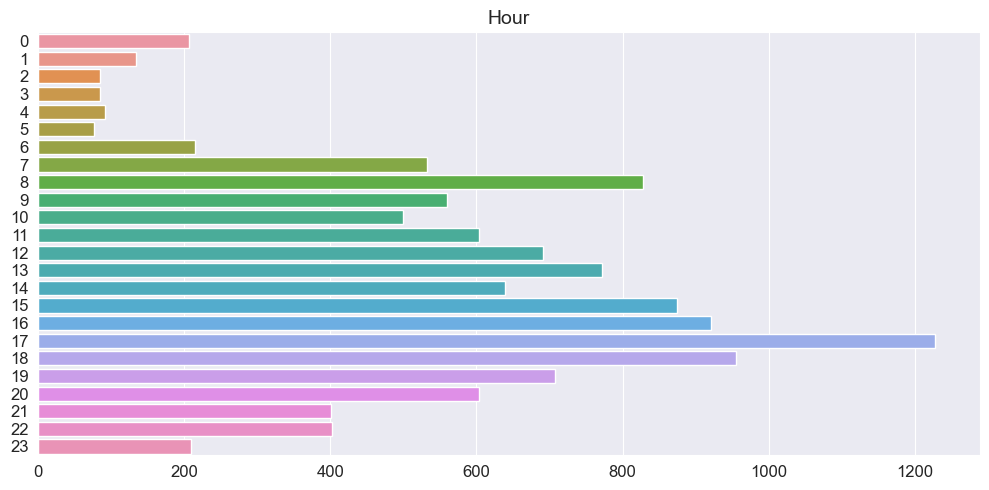

In [24]:
plt.figure(figsize=(10,5))
# Create a horizontal bar chart that shows the counts of each unique value in the 'hour' column of the DataFrame `df`
sns.countplot(data=df, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
# Adjust the spacing between the plot elements to make the plot more compact and visually appealing
plt.tight_layout()

In [25]:
#most accidents occured during 7am to 6pm. Highest around 5pm.

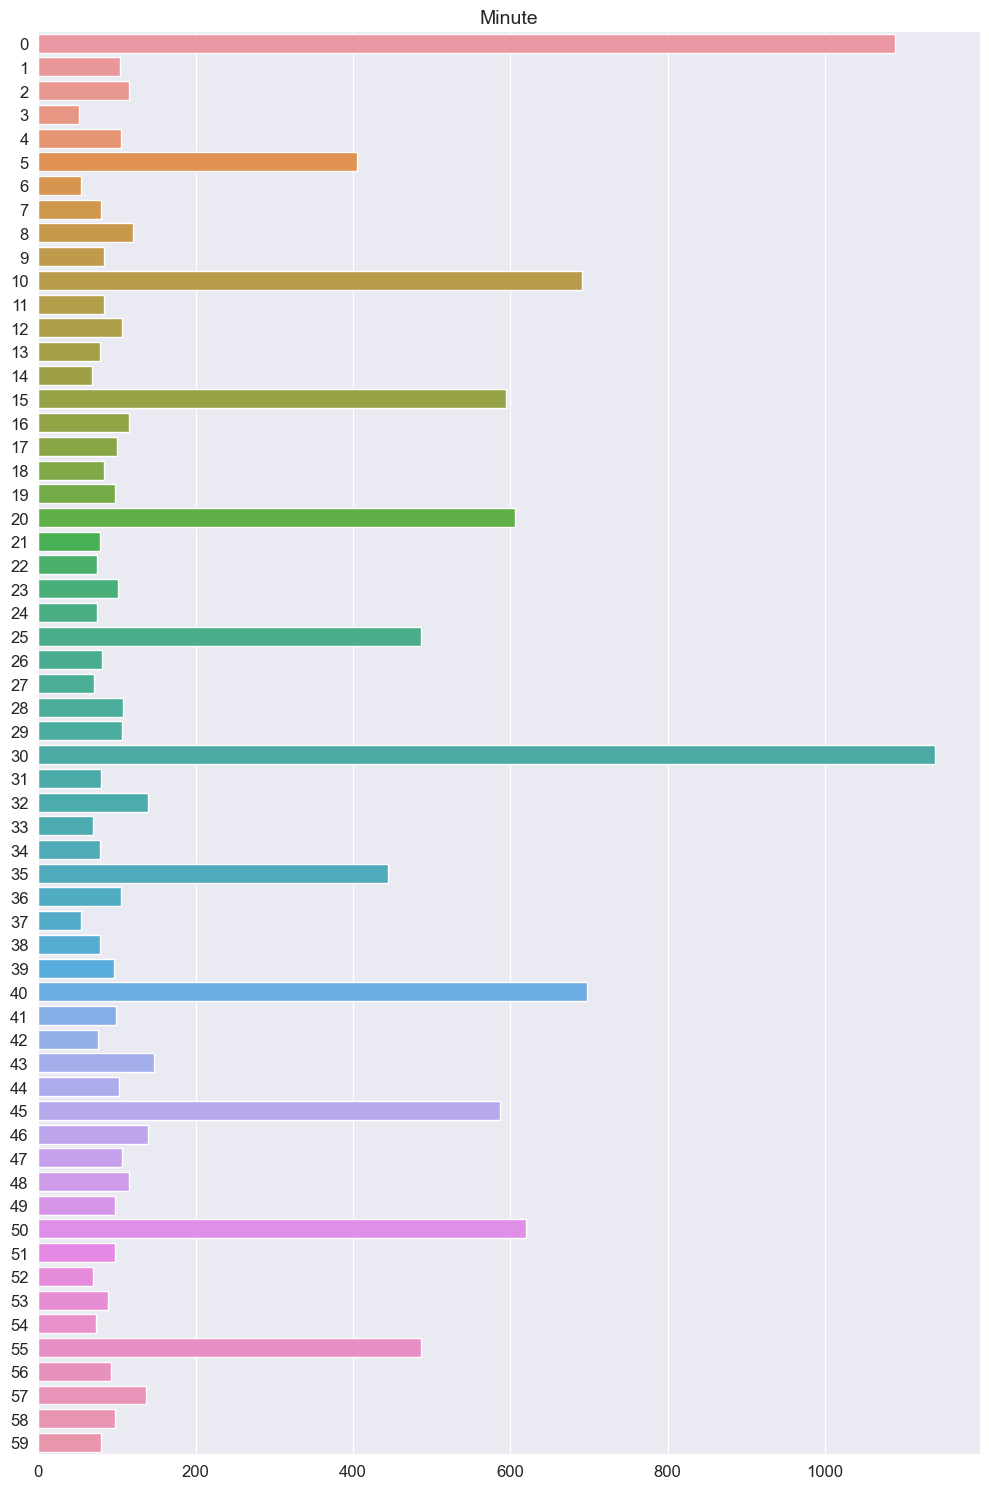

In [26]:
plt.figure(figsize=(10,15))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [27]:
min = list(range(5,56, 5))
def convert_minutes(x: int):
    for m in min:
        if x % m == x and x > m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in min+[0]:
            return x

Overall, above code has the function convert_minutes takes an integer argument x representing
the number of minutes after the hour and 
returns the nearest multiple of 5 minutes that x falls into,
with some special cases for when x is in the last 5 minutes of the hour or the first 5 minutes of the next hour.






In [28]:
df['minute'] = df['minute'].apply(lambda x: convert_minutes(x))

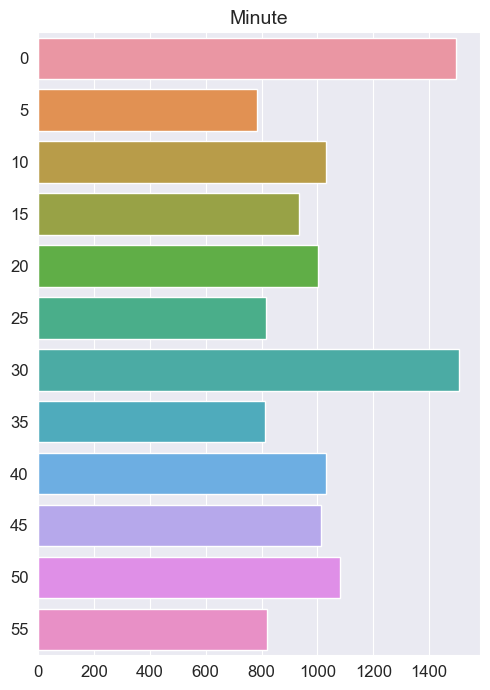

In [29]:
plt.figure(figsize=(5,7))
sns.countplot(data=df, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [30]:
num_cols = df.dtypes[df.dtypes == 'int64'].index.tolist()
cat_cols = df.dtypes[df.dtypes != 'int64'].index.tolist()
df[cat_cols]

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [31]:
#checking missing values
df.isna().sum()[df.isna().sum() != 0]

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

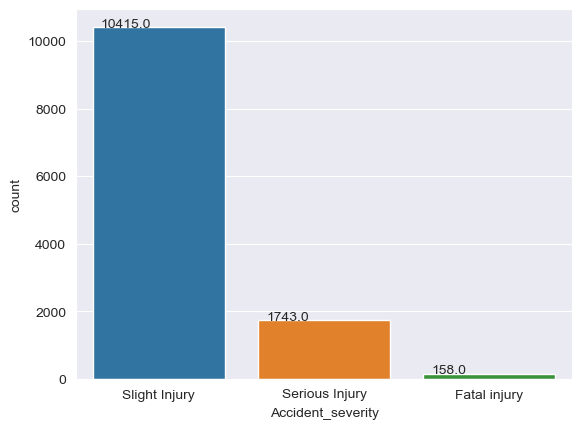

In [32]:
ax = sns.countplot(x=df["Accident_severity"])

# For each bar in the countplot, annotate the height of the bar on the plot
for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))

plt.show()

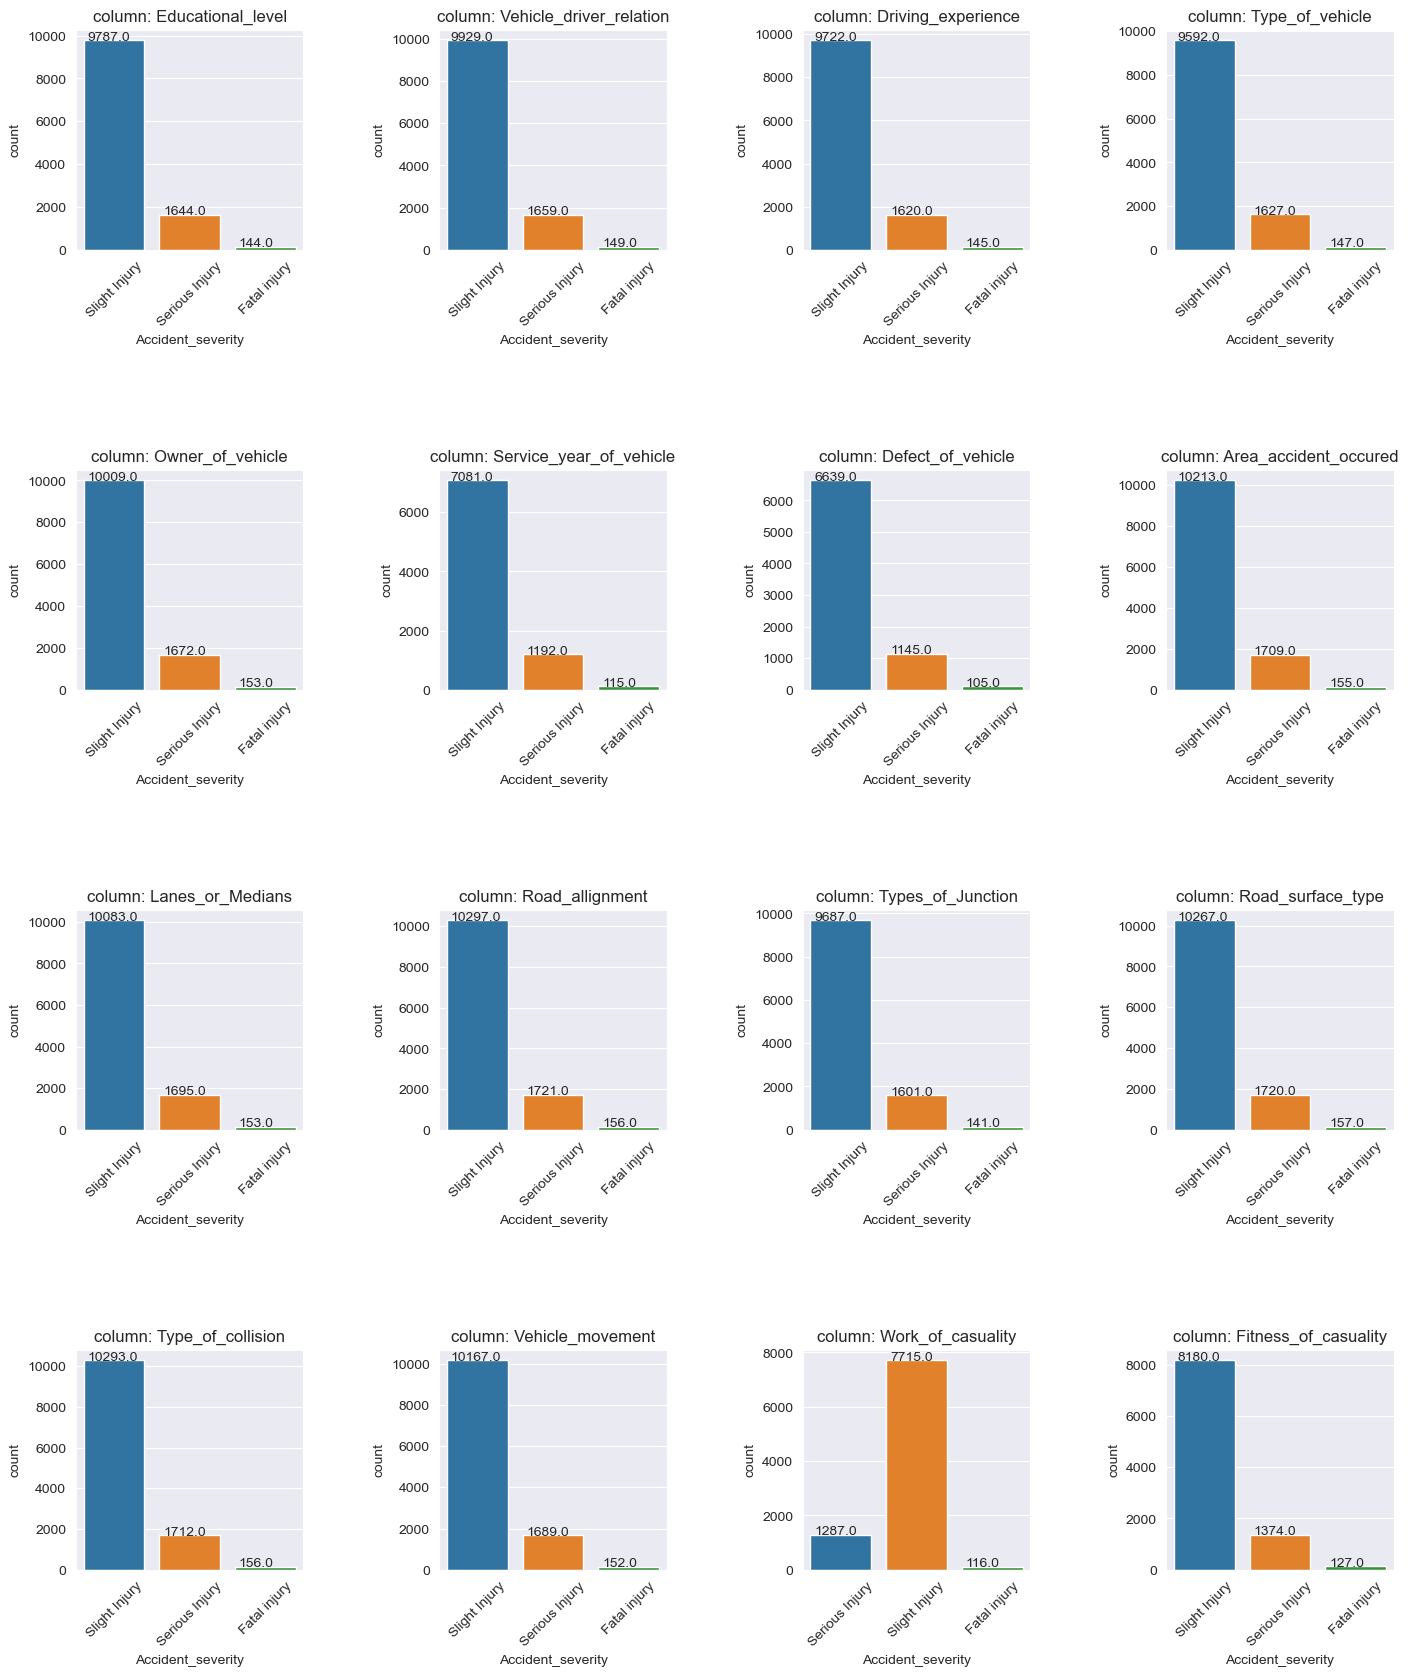

In [33]:
fig = plt.figure(figsize = (17,20))

# adjust the horizontal and vertical space between subplots
fig.subplots_adjust(hspace=1, wspace=0.6)
# create a list of colors
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']
# get a list of column names that contain missing values
cols = df.isna().sum()[df.isna().sum() != 0].index.tolist()

# loop through each column with missing values
for i,col in enumerate(cols):
    ax = fig.add_subplot(4, 4, i+1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)    # rotate the x-axis labels for readability
    sns.countplot(x=df.dropna(subset=[col])["Accident_severity"]) # create a countplot of the target variable with non-missing values of the current column, using the colors from the list
    for p in ax.patches:
      ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))
    ax.set_title('column: ' + str(col))
plt.show()

In [34]:
# dropping columns that can cause imbalance while imputation
df.drop(columns = ['Defect_of_vehicle', 'Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality',], inplace=True)

In [35]:
# Create a list of column names that have missing values
impute_cols = [x for x in df.isna().sum()[df.isna().sum() != 0].index.tolist()]
# Loop through the columns with missing values
for feat in impute_cols:
    mode = df[feat].mode()[0]       # Calculate the mode of the column
    df[feat].fillna(mode, inplace=True)      # Fill missing values with the mode

In [36]:
df.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
minute                         0
dtype: int64

# Encoding

In [37]:
def ordinal_encoder(df, feats):  # define function that takes a DataFrame and a list of columns to encode
    for feat in feats:  # iterate over the features to be encoded
        feat_val = list(1+np.arange(df[feat].nunique()))  # create a list of values to replace the categories with
        feat_key = list(df[feat].sort_values().unique())  # get the unique categories of the feature, sorted in ascending order
        feat_dict = dict(zip(feat_key, feat_val))  # create a dictionary mapping each category to a value
        df[feat] = df[feat].map(feat_dict)  # replace the categories with their corresponding values
    return df  # return the encoded DataFrame

df = ordinal_encoder(df, df.drop(['Accident_severity'], axis=1).columns)  # apply the ordinal_encoder function to all columns except 'Accident_severity'
df.shape  # output the number of rows and columns in the DataFrame

(12316, 29)

In [38]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity,hour,minute
0,2,1,2,1,1,1,4,4,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,6,10,Slight Injury,18,2
1,2,2,2,5,4,12,4,3,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,6,17,Slight Injury,18,2
2,2,1,2,5,1,6,4,6,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,6,1,Serious Injury,18,2
3,4,1,2,5,3,12,1,6,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,6,2,Slight Injury,2,3
4,4,1,2,5,2,1,4,3,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,6,17,Slight Injury,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,7,2,2,5,2,5,4,6,6,5,6,2,1,1,4,3,9,2,1,3,4,3,6,4,6,11,Slight Injury,17,4
12312,4,5,2,2,3,1,4,6,6,3,1,2,1,1,4,3,9,2,1,5,4,3,6,4,6,11,Slight Injury,19,1
12313,4,3,2,5,3,2,4,2,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,6,2,Serious Injury,14,12
12314,4,1,1,5,4,6,4,2,7,5,8,2,1,1,1,3,9,2,1,5,4,3,6,4,6,6,Slight Injury,14,12


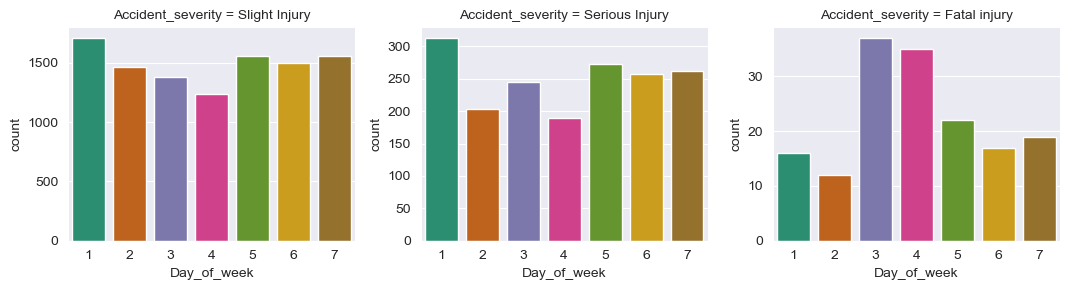

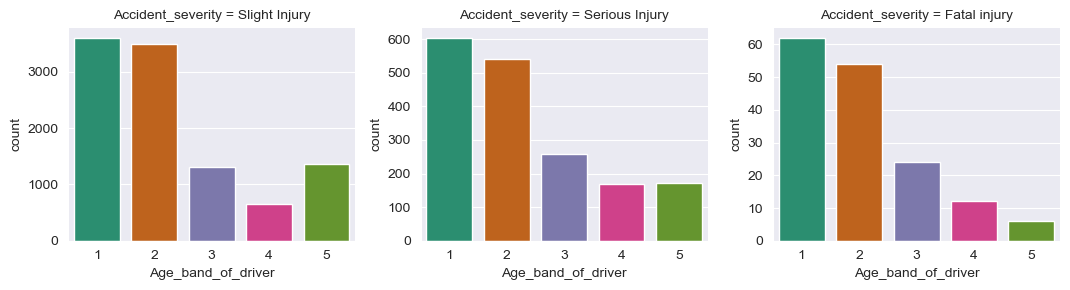

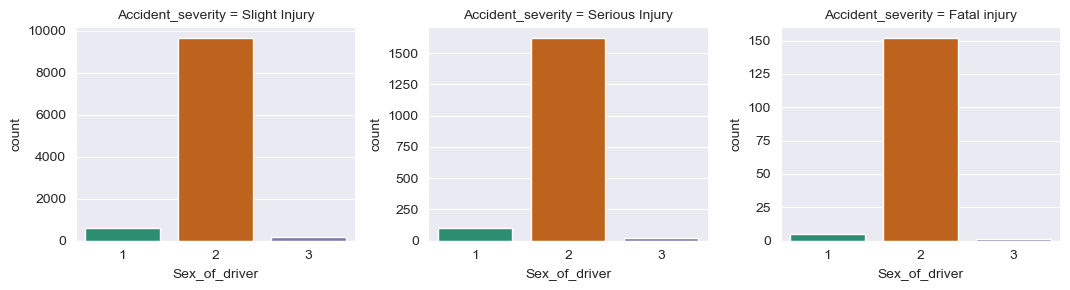

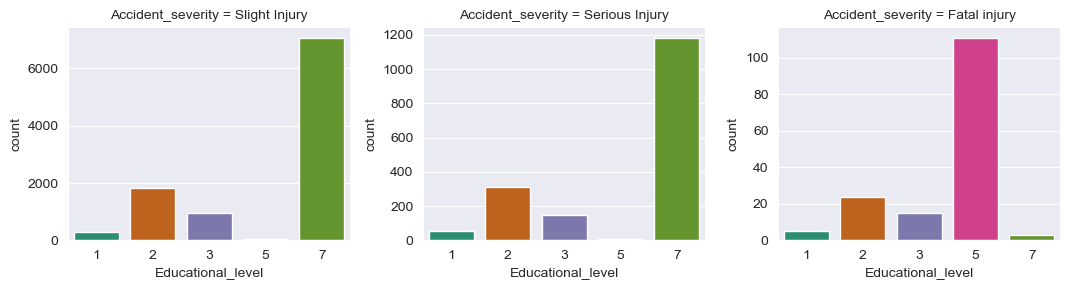

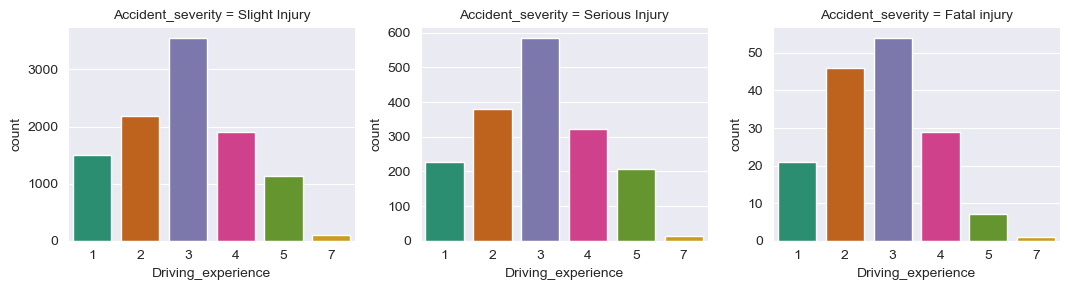

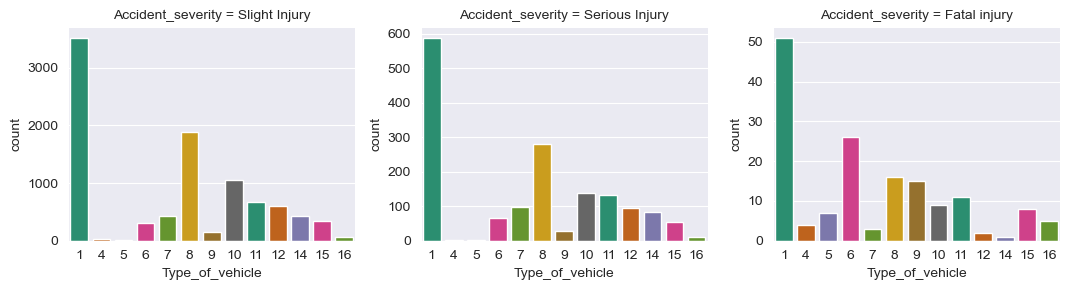

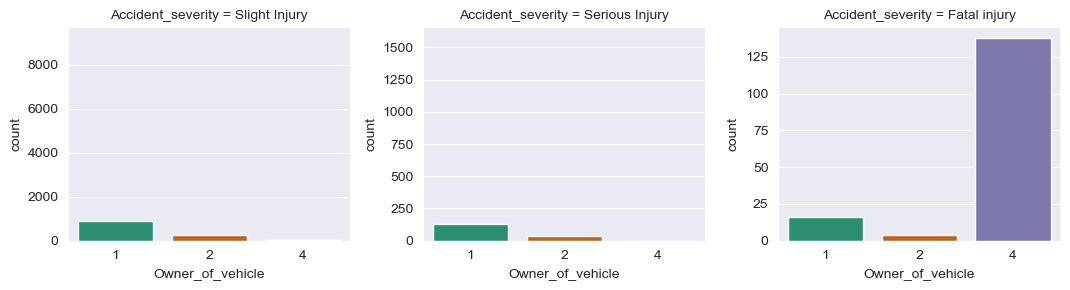

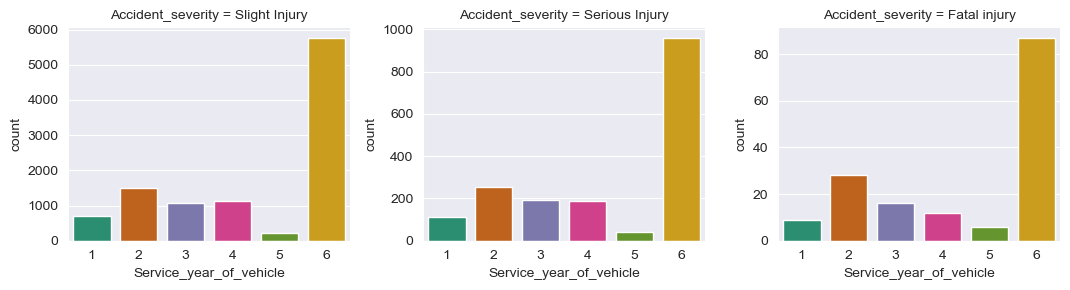

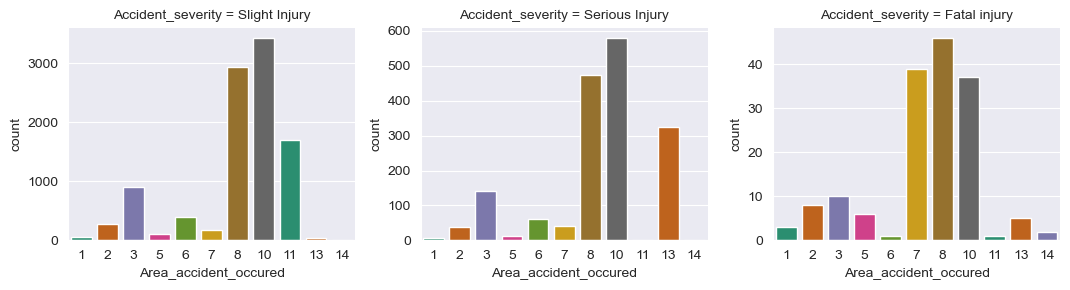

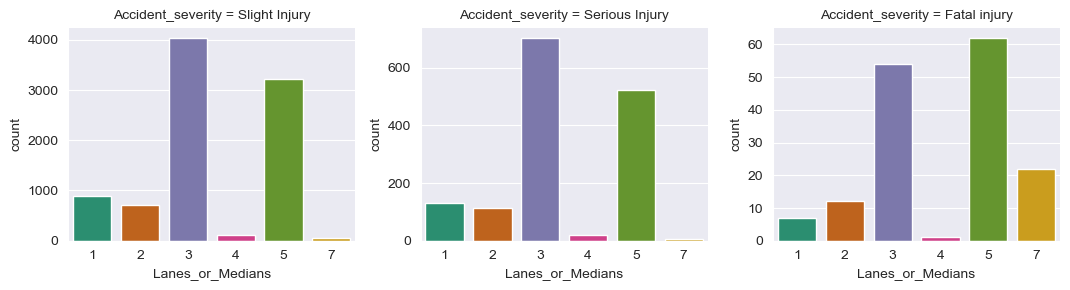

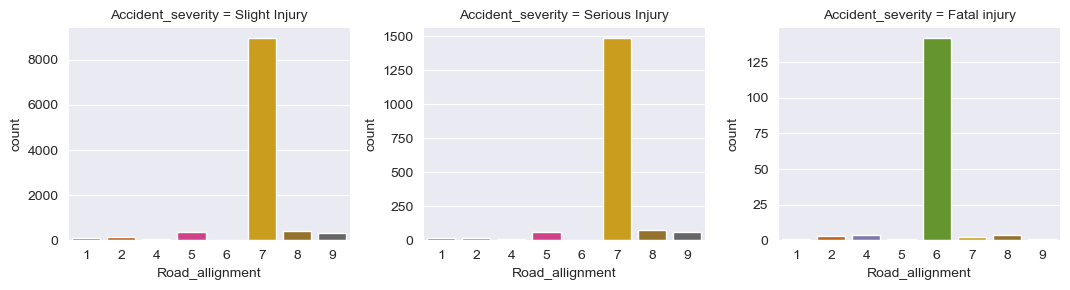

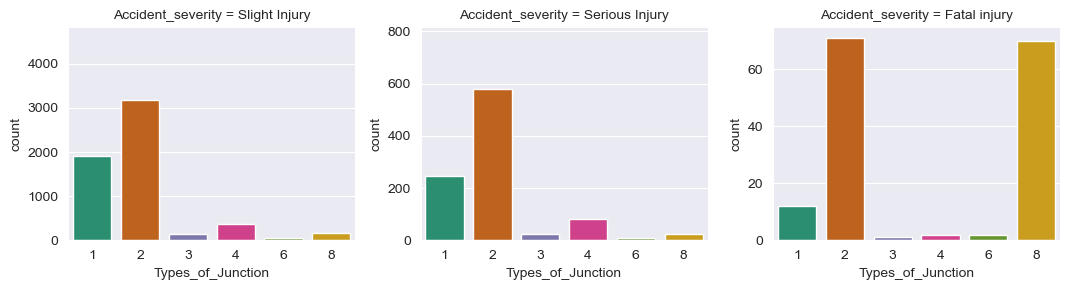

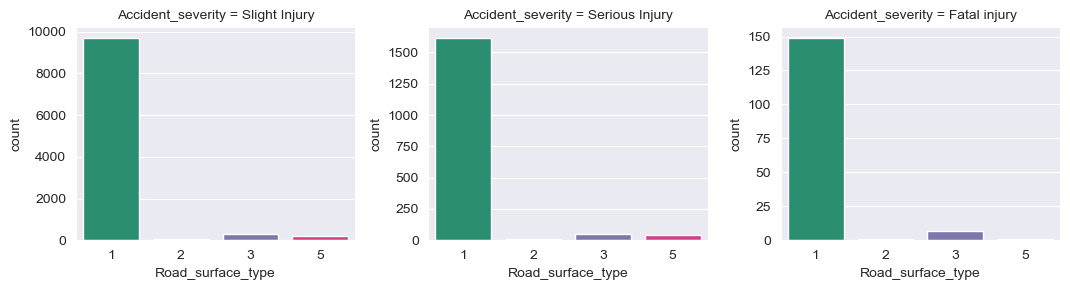

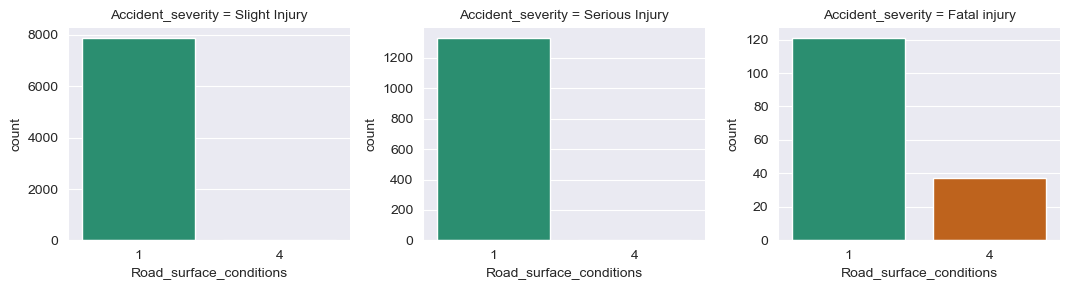

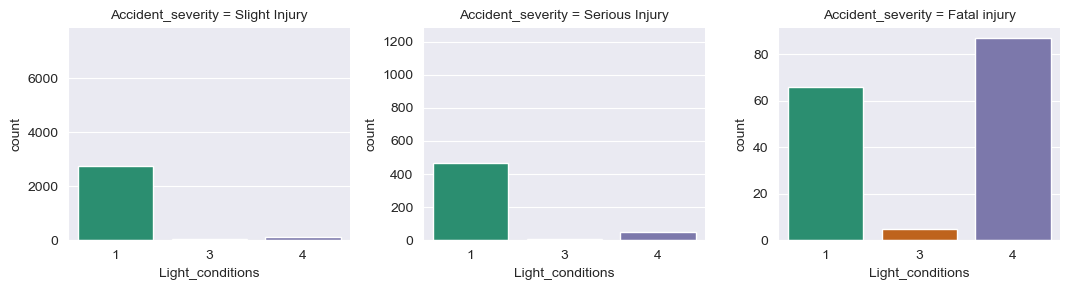

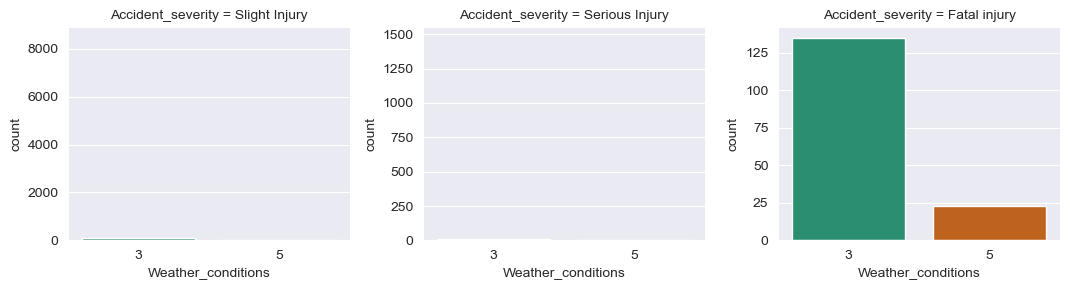

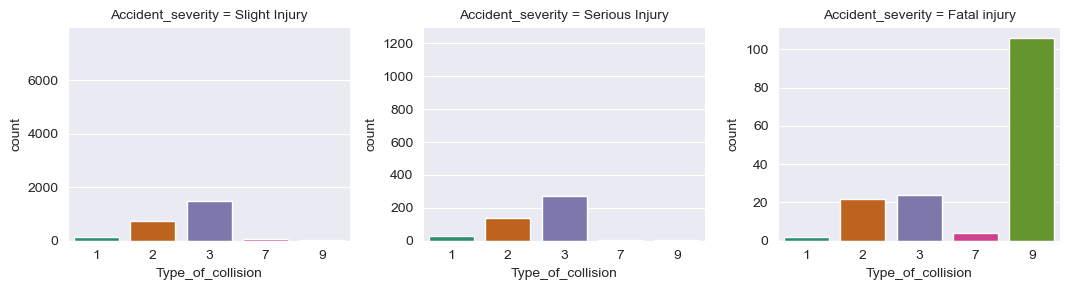

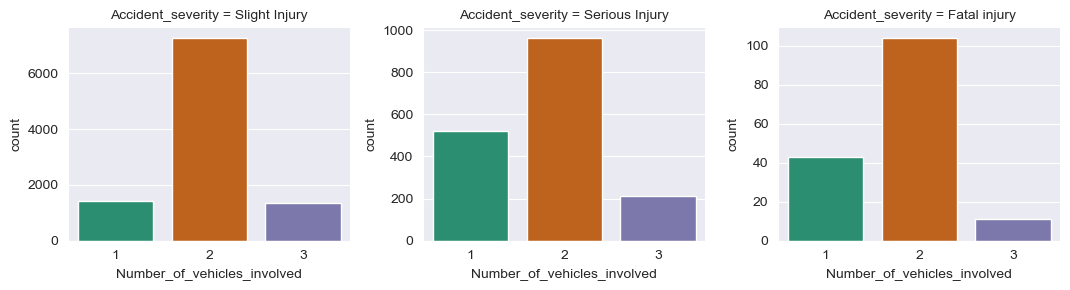

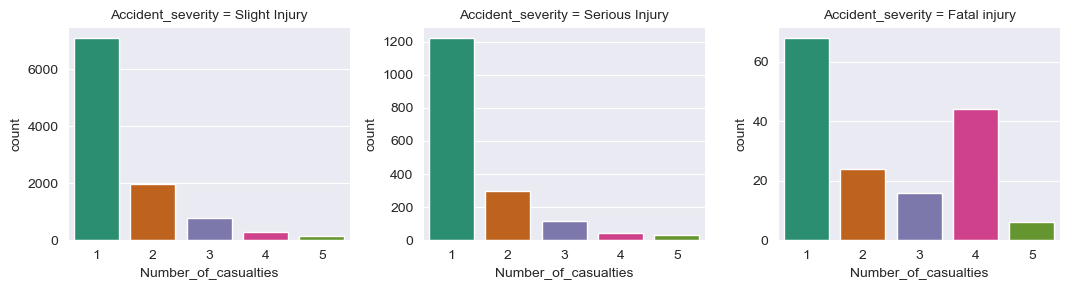

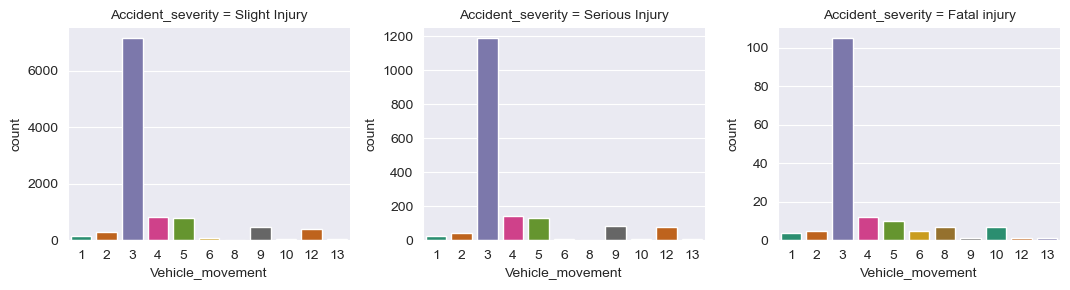

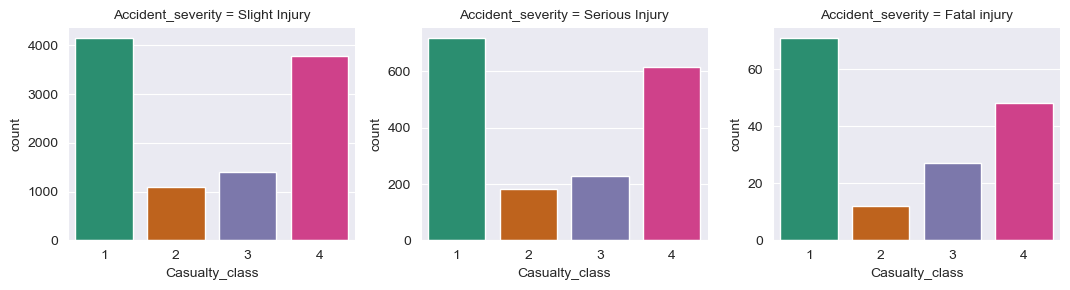

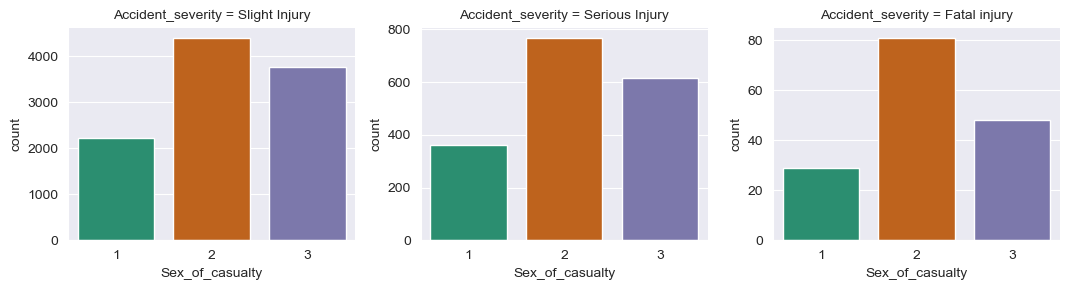

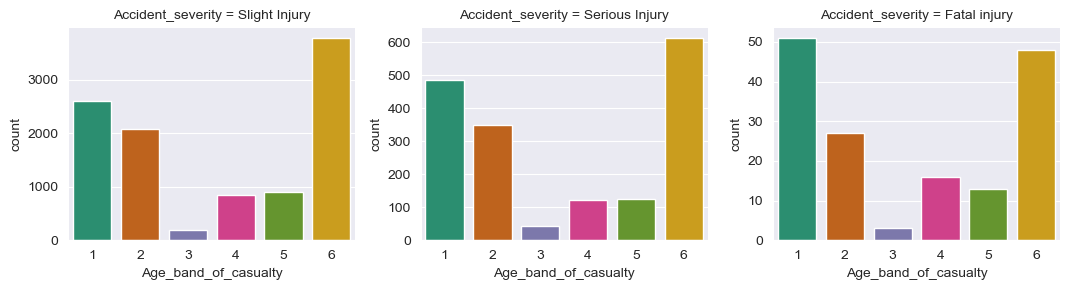

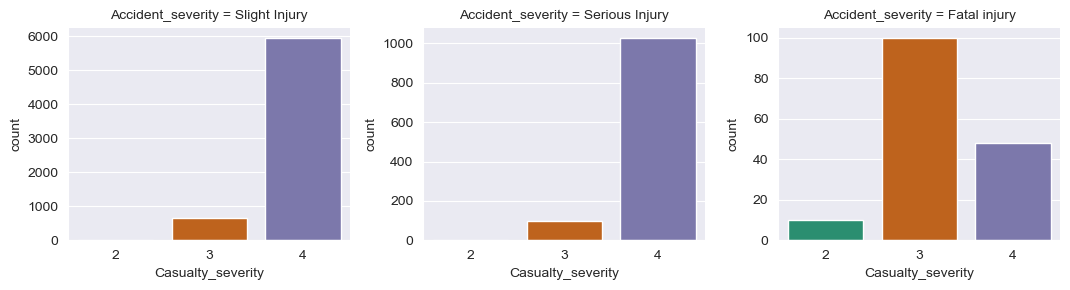

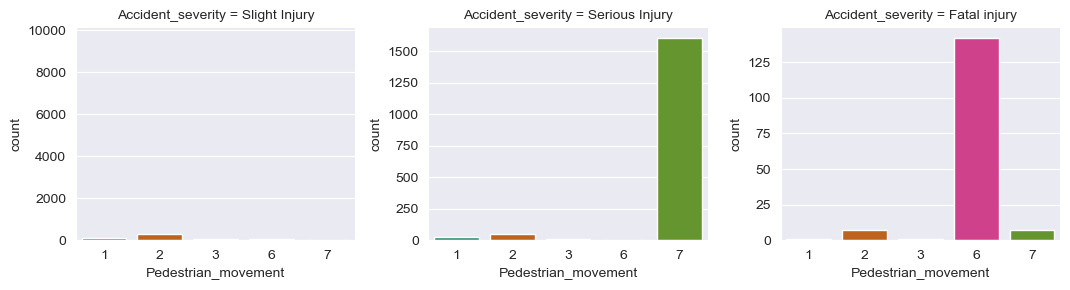

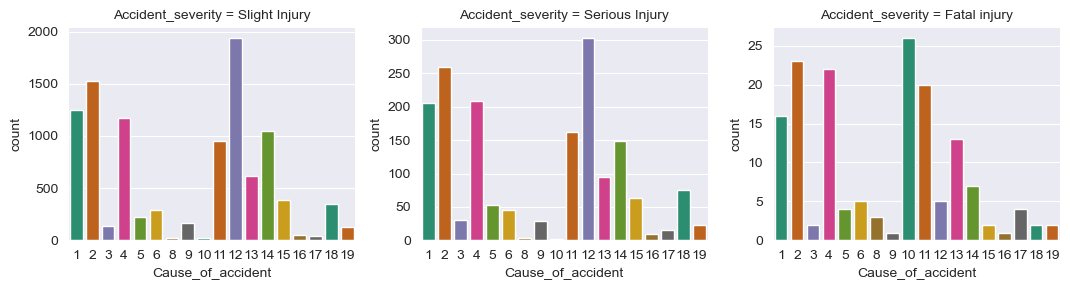

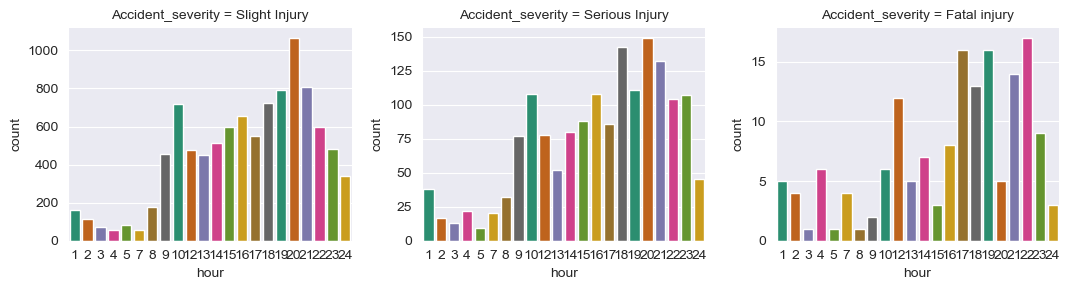

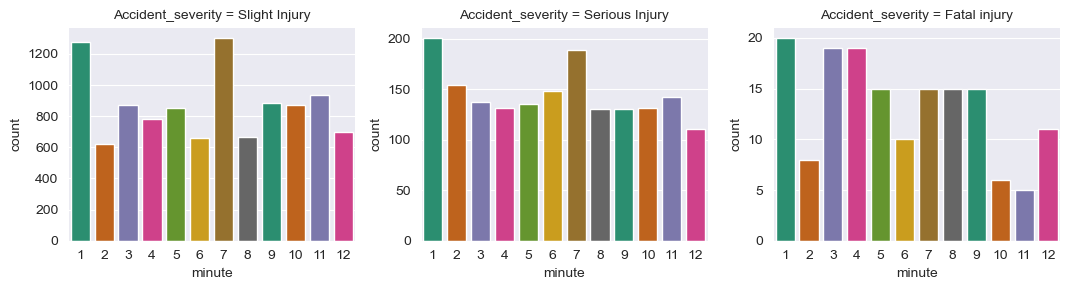

In [39]:
for col in df.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(df, col='Accident_severity', aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

<Axes: >

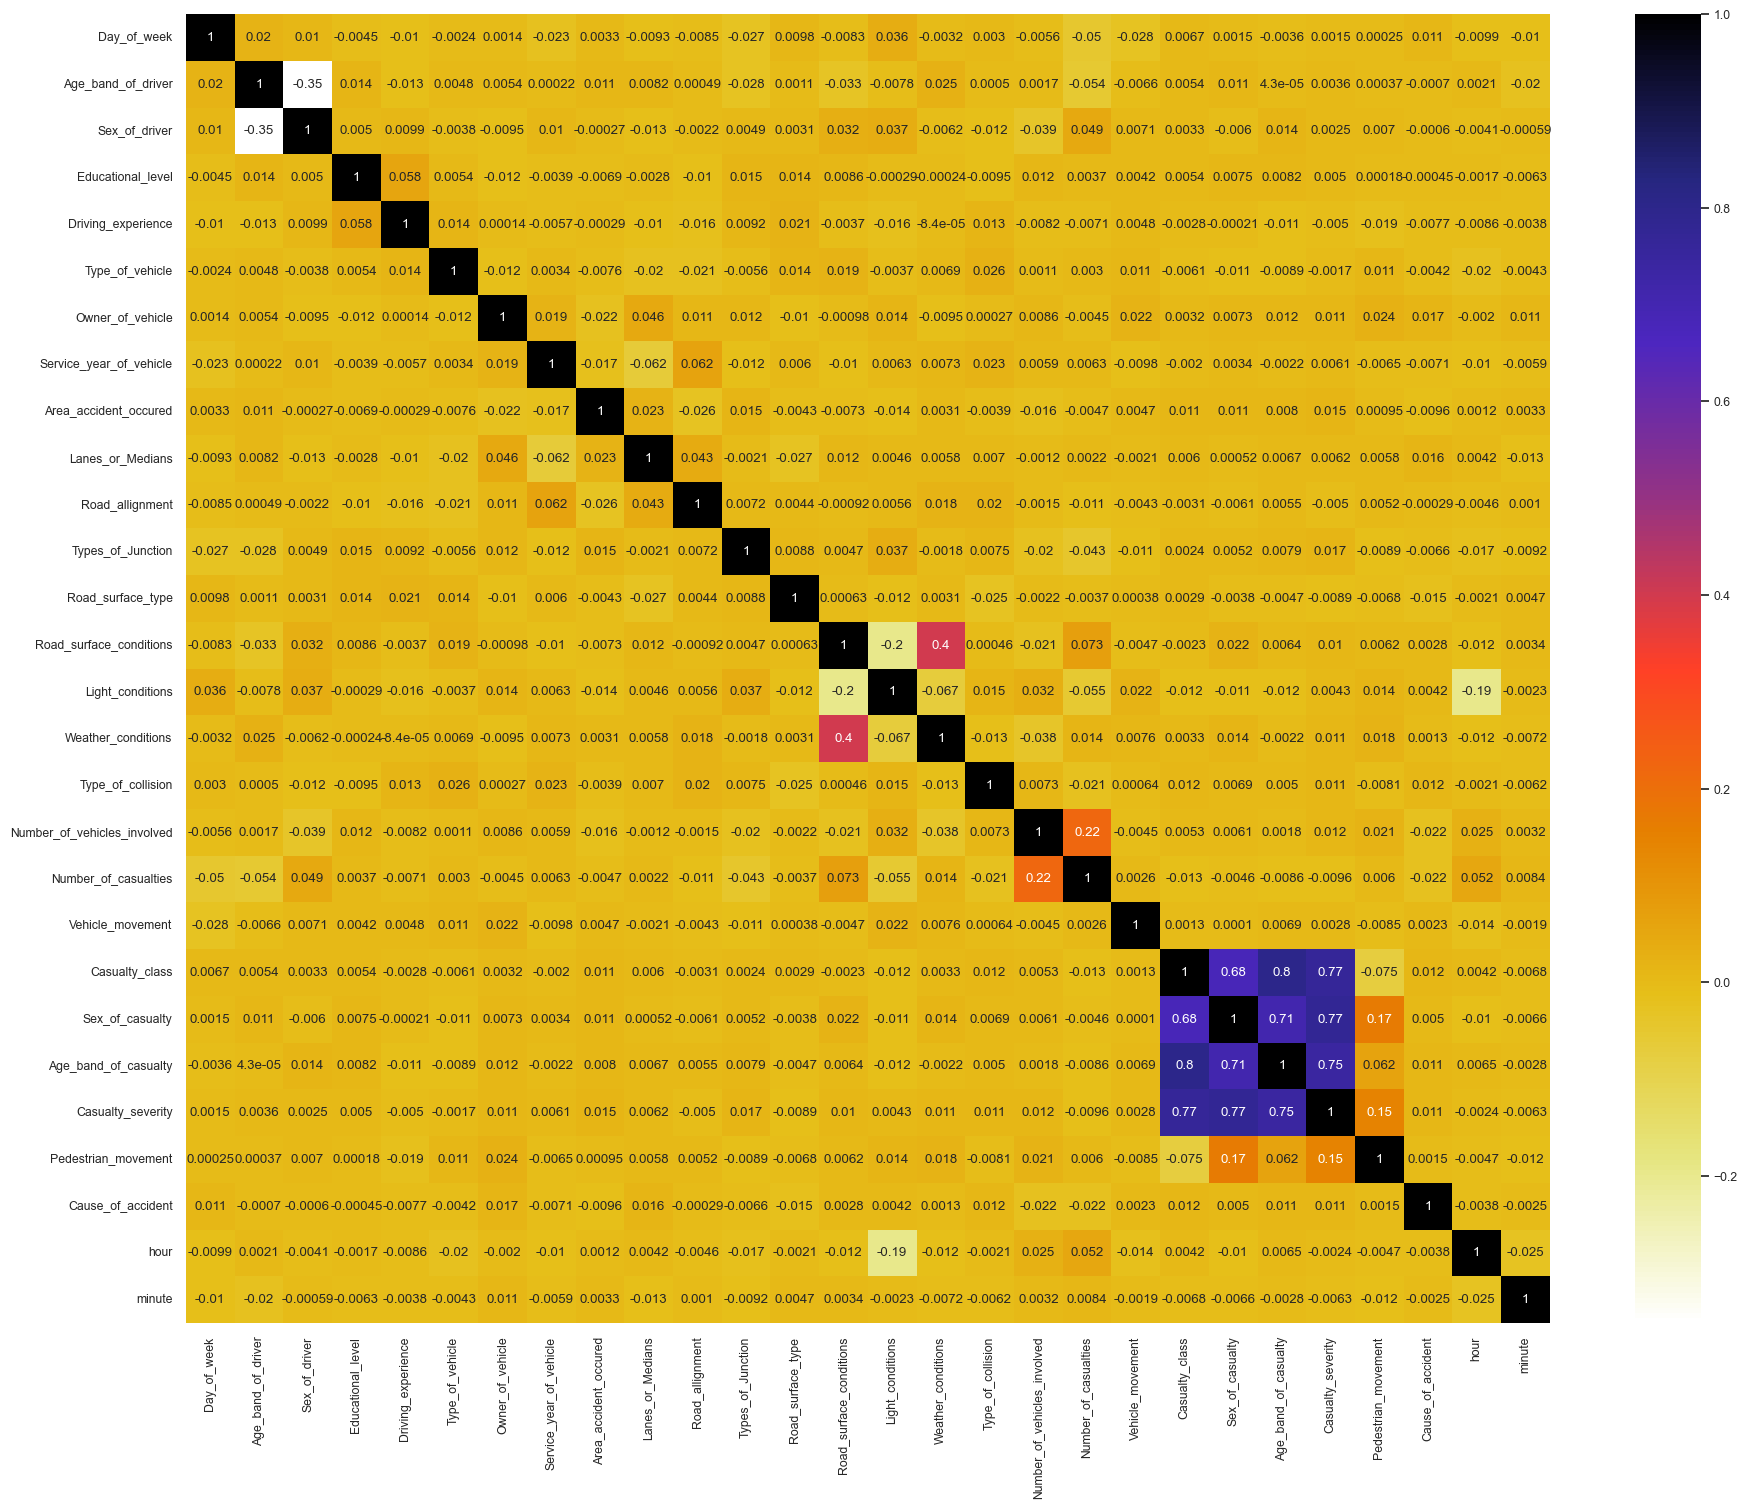

In [40]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

### Upsampling

In [41]:
#categorical feature engineering- Chi squared test or Anova test

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV


In [43]:
X = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


### rom imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

The code block is responsible for upsampling the minority class using SMOTE technique. 
The Counter function is used to count the number of instances in each class in the training set 
before and after the upsampling process, while the SMOTE() function is used to perform the upsampling.
Finally, the code prints the number of instances in each class
after the upsampling process, as well as the shape of the new dataset.

In [44]:
# upsampling using smote

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(y_train)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", X_train.shape, y_train.shape)

Class= Slight Injury, n=7324 (84.96%)
Class= Serious Injury, n=1191 (13.82%)
Class= Fatal injury, n=106 (1.23%)
Class= Slight Injury, n=7324 (33.33%)
Class= Serious Injury, n=7324 (33.33%)
Class= Fatal injury, n=7324 (33.33%)
Upsampled data shape:  (21972, 28) (21972,)


The first time, the code prints the count of each class
before the oversampling is done, and the second time, 
it prints the count of each class after the oversampling is done. 
By printing the count of each class before and after, 
we can see the impact of SMOTE on the class distribution. 
The final line of the code is to print the shape of the upsampled data.






In [45]:
y_test

4281      Slight Injury
4010      Slight Injury
1022     Serious Injury
8775      Slight Injury
10000     Slight Injury
              ...      
9855      Slight Injury
7302     Serious Injury
9023      Slight Injury
7936      Slight Injury
438       Slight Injury
Name: Accident_severity, Length: 3695, dtype: object

In [46]:
# Encode the target variable in the test set using ordinal encoding
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']

# Encode the target variable in the train set using ordinal encoding
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

### Baseline Modeling

In [47]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
modelling(X_train, y_train-1, X_test, y_test-1, xgb=True, rf=True, extree=True)


{'xgb': [0.7964817320703653],
 'rf': [0.7994587280108254],
 'extree': [0.8113667117726657]}

In [50]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [51]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [52]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [53]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


In [54]:
model_performance(extree,y_test, y_pred)

### Hyperparameter Tuning

In [55]:
# Split the data into 3 folds for cross-validation
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# Define a dictionary of parameter values to search over
# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

# Create an instance of the ExtraTreesClassifier model
extree_estimator = ExtraTreesClassifier()

# Use GridSearchCV to perform a grid search over the parameter values, 
# using the F1 score as the evaluation metric and 3-fold cross-validation
# to estimate the model's performance
gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

# Fit the grid search object to the training data to find the best parameter values
extree_model = gsearch.fit(X=X_train, y=y_train)

# Print the best parameter values and the corresponding F1 score

print(gsearch.best_params_, gsearch.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 300} 0.8612508793940551


In [56]:
#Define a K-fold object with 3 splits, shuffled, and random state set to 101
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

#Define a dictionary of hyperparameters for tuning the ExtraTreesClassifier
params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

#Define an ExtraTreesClassifier with some initial hyperparameters set to values we found earlier

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

#Define a GridSearchCV object using the ExtraTreesClassifier, hyperparameters, and performance metric

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)
#Fit the GridSearchCV object to the training data
extree_model2 = gsearch2.fit(X=X_train, y=y_train)

#Print out the best hyperparameters and score found by the GridSearchCV object

(gsearch2.best_params_, gsearch2.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': None,
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.921743275321267)

In [57]:
# Define a new ExtraTreesClassifier instance with the hyperparameters found during grid search
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

# Fit the model using the training data
extree_tuned.fit(X_train, y_train)

# Make predictions on the test data using the tuned model
y_pred_tuned = extree_tuned.predict(X_test)